In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(train_images, train_label), (test_images, test_label) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 7s 2us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [7]:
def show_img(img):
    plt.figure(figsize=(8, 1))
    plt.imshow(train_images[img])

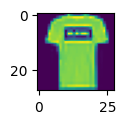

In [8]:
show_img(1)

In [10]:
class_names[train_label[1]]

'T-shirt/top'

In [11]:
train_images_scaled = train_images / 255
test_images_scaled = test_images / 255

In [12]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
from tensorflow import keras
def get_model(hidden_layers=1):
    # Flatten layer for input
    layers = [keras.layers.Flatten(input_shape=(28, 28))]
    # hideen layers
    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(500, activation='relu'),)
    # output layer    
    layers.append(keras.layers.Dense(10, activation='sigmoid'))

    model = keras.Sequential(layers)
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [19]:
model = get_model(1)
model.fit(train_images_scaled, train_label, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 32s 16ms/step - loss: 0.4792 - accuracy: 0.8297
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3610 - accuracy: 0.8669
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3228 - accuracy: 0.8805
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3003 - accuracy: 0.8897
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2795 - accuracy: 0.8967


In [20]:
model = get_model(2)
model.fit(train_images_scaled, train_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 43s 22ms/step - loss: 0.4656 - accuracy: 0.8306
Epoch 2/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3543 - accuracy: 0.8686
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3206 - accuracy: 0.8824
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2969 - accuracy: 0.8891
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2757 - accuracy: 0.8968


In [21]:
model.predict(test_images_scaled)[2]

313/313 [==============================] - 4s 11ms/step


array([2.0077990e-03, 1.0000000e+00, 3.8722583e-06, 2.7549240e-01,
       2.7191266e-03, 1.1725880e-09, 3.3760623e-03, 8.9940926e-14,
       1.9467093e-06, 5.7354580e-08], dtype=float32)

In [22]:
tf.config.experimental.list_physical_devices() 

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [23]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model(1)
    cpu_model.fit(train_images_scaled, train_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 35s 17ms/step - loss: 0.4754 - accuracy: 0.8300
Epoch 2/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3593 - accuracy: 0.8683
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3209 - accuracy: 0.8811
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2983 - accuracy: 0.8888
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2783 - accuracy: 0.8967
2min 38s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [24]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model(5)
    cpu_model.fit(train_images_scaled, train_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 82s 42ms/step - loss: 0.5193 - accuracy: 0.8135
Epoch 2/5
1875/1875 [==============================] - 102s 54ms/step - loss: 0.3919 - accuracy: 0.8593
Epoch 3/5
1875/1875 [==============================] - 100s 53ms/step - loss: 0.3515 - accuracy: 0.8744
Epoch 4/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.3262 - accuracy: 0.8806
Epoch 5/5
1875/1875 [==============================] - 148s 79ms/step - loss: 0.3066 - accuracy: 0.8879
8min 42s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
